In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\101624\Downloads\Forecast_Jupyter\Linear_Regression\inputdata.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178330 entries, 0 to 178329
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    178330 non-null  object 
 1   continent                                   167880 non-null  object 
 2   location                                    178330 non-null  object 
 3   date                                        178330 non-null  object 
 4   total_cases                                 171957 non-null  float64
 5   new_cases                                   171787 non-null  float64
 6   new_cases_smoothed                          170618 non-null  float64
 7   total_deaths                                153817 non-null  float64
 8   new_deaths                                  153832 non-null  float64
 9   new_deaths_smoothed                         152685 non-null  float64
 

In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
#iso_code, continent are not used for linear regression

In [7]:
df = df.drop(['iso_code','continent'],axis=1)

In [8]:
df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178325,Zimbabwe,4/8/2022,246925.0,55.0,73.000,5457.0,2.0,1.857,16361.132,3.644,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
178326,Zimbabwe,4/9/2022,246925.0,0.0,63.429,5457.0,0.0,1.571,16361.132,0.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
178327,Zimbabwe,4/10/2022,246958.0,33.0,61.857,5457.0,0.0,1.571,16363.318,2.187,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
178328,Zimbabwe,4/11/2022,247010.0,52.0,56.857,5460.0,3.0,1.286,16366.764,3.445,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [9]:
#convert all NAN to 0

In [10]:
df = df.fillna(0)

In [11]:
df

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,2/24/2020,5.0,5.0,0.000,0.0,0.0,0.000,0.126,0.126,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,Afghanistan,2/25/2020,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,Afghanistan,2/26/2020,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,Afghanistan,2/27/2020,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,Afghanistan,2/28/2020,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178325,Zimbabwe,4/8/2022,246925.0,55.0,73.000,5457.0,2.0,1.857,16361.132,3.644,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
178326,Zimbabwe,4/9/2022,246925.0,0.0,63.429,5457.0,0.0,1.571,16361.132,0.000,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
178327,Zimbabwe,4/10/2022,246958.0,33.0,61.857,5457.0,0.0,1.571,16363.318,2.187,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
178328,Zimbabwe,4/11/2022,247010.0,52.0,56.857,5460.0,3.0,1.286,16366.764,3.445,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


In [12]:
import datetime
from datetime import datetime
df.dtypes

location                                    object
date                                        object
total_cases                                float64
new_cases                                  float64
new_cases_smoothed                         float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 65, dtype: object

In [13]:
#convert date to date data type
#datetime.date(df['date'].astype(str),'%m/%d/%Y')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [14]:
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

In [15]:
df = df.drop(['date'],axis=1)

In [16]:
df

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,day,month
0,Afghanistan,5.0,5.0,0.000,0.0,0.0,0.000,0.126,0.126,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,24,2
1,Afghanistan,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,25,2
2,Afghanistan,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,26,2
3,Afghanistan,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,27,2
4,Afghanistan,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178325,Zimbabwe,246925.0,55.0,73.000,5457.0,2.0,1.857,16361.132,3.644,4.837,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,8,4
178326,Zimbabwe,246925.0,0.0,63.429,5457.0,0.0,1.571,16361.132,0.000,4.203,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,9,4
178327,Zimbabwe,246958.0,33.0,61.857,5457.0,0.0,1.571,16363.318,2.187,4.099,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,10,4
178328,Zimbabwe,247010.0,52.0,56.857,5460.0,3.0,1.286,16366.764,3.445,3.767,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,11,4


In [17]:
#change categorical values
df['tests_units'].astype('category').value_counts()

0                  82819
tests performed    71234
people tested      14920
samples tested      8589
units unclear        768
Name: tests_units, dtype: int64

In [18]:
cor = df.corr()
cor

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,day,month
total_cases,1.000000,0.816875,0.839962,0.955906,0.669987,0.693160,0.104510,0.033322,0.044625,0.136430,...,-0.051785,-0.269521,-0.106423,0.032092,-0.002099,-0.005971,0.000421,0.128213,-0.002587,-0.022449
new_cases,0.816875,1.000000,0.978497,0.752084,0.657371,0.647723,0.093887,0.091409,0.103665,0.101707,...,-0.037569,-0.235871,-0.092821,0.012145,-0.005270,-0.004705,-0.004776,0.105010,-0.000198,-0.049329
new_cases_smoothed,0.839962,0.978497,1.000000,0.767757,0.651489,0.664479,0.097974,0.081321,0.106015,0.104335,...,-0.038418,-0.239763,-0.094392,0.024653,-0.002819,-0.002768,-0.000558,0.108729,-0.000132,-0.052676
total_deaths,0.955906,0.752084,0.767757,1.000000,0.758571,0.782768,0.077008,0.015773,0.020933,0.153909,...,-0.059963,-0.301031,-0.119384,0.039008,0.006952,-0.002168,0.006611,0.107470,-0.001392,-0.003818
new_deaths,0.669987,0.657371,0.651489,0.758571,1.000000,0.975460,0.021015,0.014596,0.015752,0.079433,...,-0.060384,-0.321415,-0.127379,0.011020,-0.001124,0.003218,-0.006605,0.017133,-0.000425,-0.008230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
excess_mortality,-0.005971,-0.004705,-0.002768,-0.002168,0.003218,0.009113,0.029975,0.014534,0.028741,0.092529,...,0.045379,0.034980,0.056435,0.288428,0.649575,1.000000,0.527021,-0.013497,0.035461,0.022920
excess_mortality_cumulative_per_million,0.000421,-0.004776,-0.000558,0.006611,-0.006605,0.000839,0.102120,0.023293,0.049665,0.217915,...,0.081423,0.044341,0.075551,0.527770,0.803995,0.527021,1.000000,0.051536,0.033541,0.007984
year,0.128213,0.105010,0.108729,0.107470,0.017133,0.019872,0.487945,0.228765,0.299768,0.400302,...,-0.015674,-0.007689,-0.024417,0.024700,0.019266,-0.013497,0.051536,1.000000,-0.049958,-0.426710
day,-0.002587,-0.000198,-0.000132,-0.001392,-0.000425,0.000294,-0.011442,-0.003678,-0.003929,-0.005674,...,-0.001549,-0.001489,-0.001731,0.016495,0.033390,0.035461,0.033541,-0.049958,1.000000,0.010239


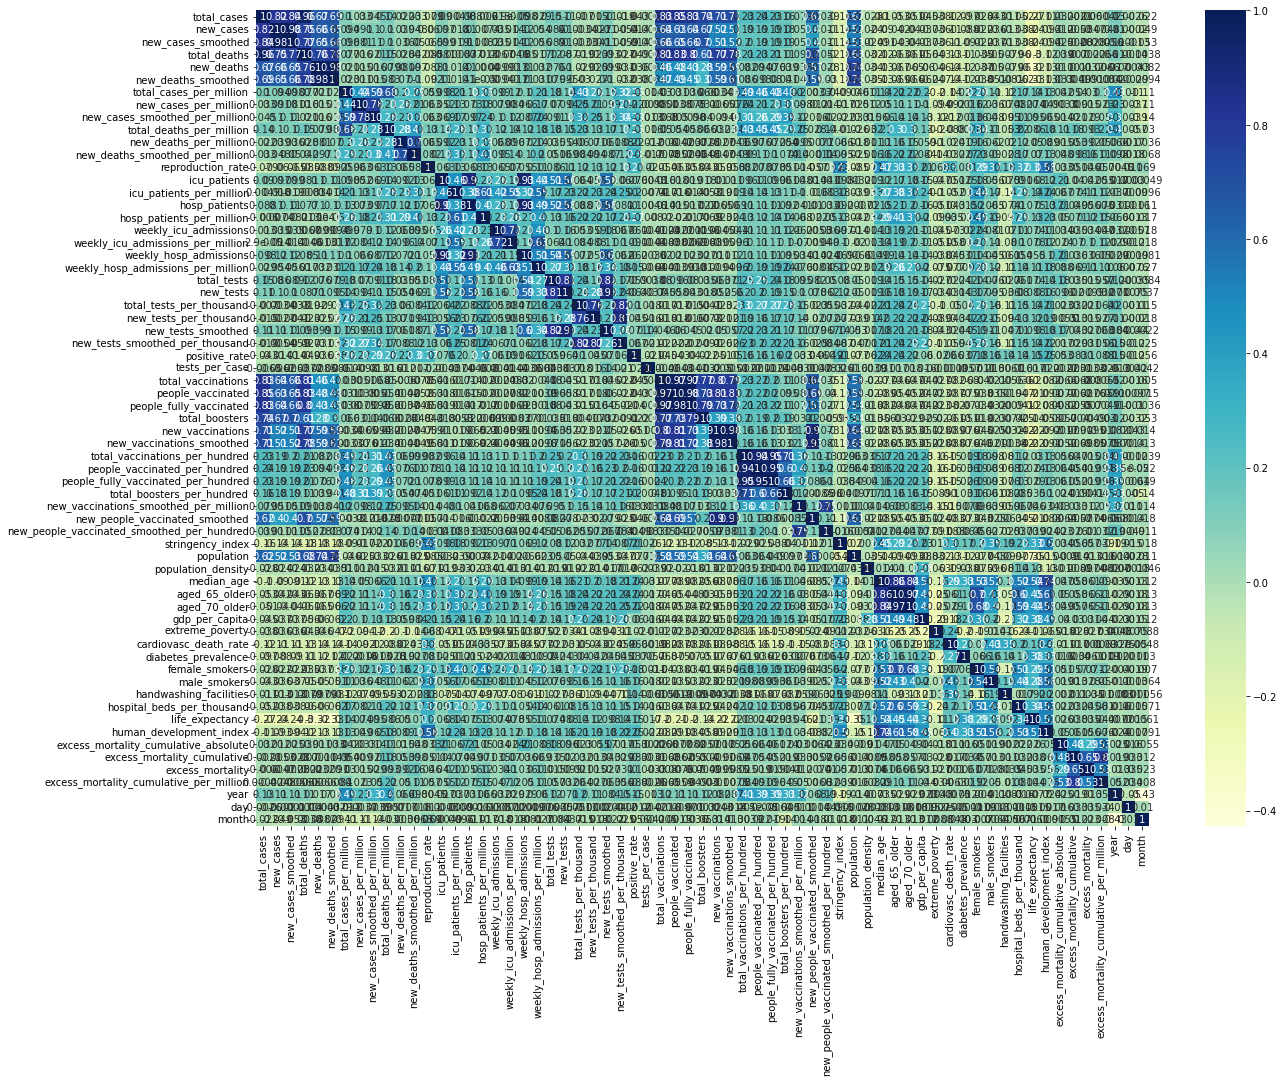

In [19]:
# Figure size
plt.figure(figsize=(20,15))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [20]:
#drop categorical variables for now
df1  = df.drop(['extreme_poverty', 'tests_units','aged_65_older', 'location'],axis=1)

In [21]:
df1

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,day,month
0,5.0,5.0,0.000,0.0,0.0,0.000,0.126,0.126,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,24,2
1,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,25,2
2,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,26,2
3,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,27,2
4,5.0,0.0,0.000,0.0,0.0,0.000,0.126,0.000,0.000,0.000,...,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178325,246925.0,55.0,73.000,5457.0,2.0,1.857,16361.132,3.644,4.837,361.578,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,8,4
178326,246925.0,0.0,63.429,5457.0,0.0,1.571,16361.132,0.000,4.203,361.578,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,9,4
178327,246958.0,33.0,61.857,5457.0,0.0,1.571,16363.318,2.187,4.099,361.578,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,10,4
178328,247010.0,52.0,56.857,5460.0,3.0,1.286,16366.764,3.445,3.767,361.777,...,1.7,61.49,0.571,0.0,0.0,0.0,0.0,2022,11,4


In [22]:
print("Correlation Matrix")
print(df1.corr())
print()

Correlation Matrix
                                         total_cases  new_cases  \
total_cases                                 1.000000   0.816875   
new_cases                                   0.816875   1.000000   
new_cases_smoothed                          0.839962   0.978497   
total_deaths                                0.955906   0.752084   
new_deaths                                  0.669987   0.657371   
...                                              ...        ...   
excess_mortality                           -0.005971  -0.004705   
excess_mortality_cumulative_per_million     0.000421  -0.004776   
year                                        0.128213   0.105010   
day                                        -0.002587  -0.000198   
month                                      -0.022449  -0.049329   

                                         new_cases_smoothed  total_deaths  \
total_cases                                        0.839962      0.955906   
new_cases             

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [24]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df1, 80))
highcorr = get_top_abs_correlations(df1, 140)

Top Absolute Correlations
new_vaccinations    new_vaccinations_smoothed         0.983095
people_vaccinated   people_fully_vaccinated           0.982730
new_cases           new_cases_smoothed                0.978497
new_deaths          new_deaths_smoothed               0.975460
total_vaccinations  people_vaccinated                 0.971192
                                                        ...   
new_cases_smoothed  people_vaccinated                 0.647615
new_cases           people_fully_vaccinated           0.643911
                    total_vaccinations                0.643291
new_vaccinations    population                        0.641219
total_vaccinations  new_people_vaccinated_smoothed    0.639564
Length: 80, dtype: float64


In [25]:
highcorr.to_csv(r'C:\Users\101624\Downloads\Forecast_Jupyter\Linear_Regression\HighCorrelated.csv')

New cases are highly correlated with 

1. total_deaths
2. total_boosters
3. new_deaths
4. people_fully_vaccinated
5. total_vaccinations
6. people_vaccinated
7. population
8. new_vaccinations


In [26]:
#From the source df, keep the above highly correlated features and
#keep the features : 'extreme_poverty', 'tests_units','aged_65_older', 'location'

In [27]:
df_for_lr = df[['location','new_cases','total_deaths','total_deaths','total_boosters','new_deaths','people_fully_vaccinated','total_vaccinations','population','new_vaccinations','extreme_poverty', 'tests_units']]

In [28]:
df_for_lr

,location,new_cases,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
0,Afghanistan,5.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,0.0,0
1,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,0.0,0
2,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,0.0,0
3,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,0.0,0
4,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39835428.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178325,Zimbabwe,55.0,5457.0,5457.0,687364.0,2.0,3586013.0,9939183.0,15092171.0,54400.0,21.4,tests performed
178326,Zimbabwe,0.0,5457.0,5457.0,700502.0,0.0,3597994.0,10005905.0,15092171.0,66722.0,21.4,tests performed
178327,Zimbabwe,33.0,5457.0,5457.0,703622.0,0.0,3599536.0,10025127.0,15092171.0,19222.0,21.4,tests performed
178328,Zimbabwe,52.0,5460.0,5460.0,0.0,3.0,0.0,0.0,15092171.0,0.0,21.4,0


In [29]:
df_ind_lr = df_for_lr[df_for_lr['location'] == 'India']

In [30]:
df_ind_lr

,location,new_cases,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
74062,India,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
74063,India,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
74064,India,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
74065,India,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
74066,India,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74861,India,1150.0,521656.0,521656.0,22829787.0,83.0,836977198.0,1.853783e+09,1.393409e+09,1310733.0,21.2,samples tested
74862,India,1054.0,521685.0,521685.0,22960711.0,29.0,837829024.0,1.855432e+09,1.393409e+09,1648753.0,21.2,samples tested
74863,India,861.0,521691.0,521691.0,23007946.0,6.0,838319304.0,1.856267e+09,1.393409e+09,835344.0,21.2,samples tested
74864,India,796.0,521710.0,521710.0,23153834.0,19.0,838867091.0,1.857308e+09,1.393409e+09,1040630.0,21.2,0


In [31]:
df_ind_lr  = df_ind_lr.reset_index()

In [32]:
df_ind_lr = df_ind_lr.drop(['index','location'],axis=1)

In [33]:
df_ind_lr

,new_cases,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.393409e+09,0.0,21.2,0
...,...,...,...,...,...,...,...,...,...,...,...
799,1150.0,521656.0,521656.0,22829787.0,83.0,836977198.0,1.853783e+09,1.393409e+09,1310733.0,21.2,samples tested
800,1054.0,521685.0,521685.0,22960711.0,29.0,837829024.0,1.855432e+09,1.393409e+09,1648753.0,21.2,samples tested
801,861.0,521691.0,521691.0,23007946.0,6.0,838319304.0,1.856267e+09,1.393409e+09,835344.0,21.2,samples tested
802,796.0,521710.0,521710.0,23153834.0,19.0,838867091.0,1.857308e+09,1.393409e+09,1040630.0,21.2,0


In [34]:
df_ind_lr['total_vaccinations'] = df_ind_lr['total_vaccinations'].astype('int64')

In [35]:
df_ind_lr['population'] = df_ind_lr['population'].astype('int64')

In [36]:
df_ind_lr

,new_cases,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
0,1.0,0.0,0.0,0.0,0.0,0.0,0,1393409033,0.0,21.2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,1393409033,0.0,21.2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,1393409033,0.0,21.2,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0,1393409033,0.0,21.2,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0,1393409033,0.0,21.2,0
...,...,...,...,...,...,...,...,...,...,...,...
799,1150.0,521656.0,521656.0,22829787.0,83.0,836977198.0,1853783376,1393409033,1310733.0,21.2,samples tested
800,1054.0,521685.0,521685.0,22960711.0,29.0,837829024.0,1855432129,1393409033,1648753.0,21.2,samples tested
801,861.0,521691.0,521691.0,23007946.0,6.0,838319304.0,1856267473,1393409033,835344.0,21.2,samples tested
802,796.0,521710.0,521710.0,23153834.0,19.0,838867091.0,1857308103,1393409033,1040630.0,21.2,0


In [37]:
#Handling categorical variables
# A function to map the categorical levels to actual numbers. You can see the categorical levels above and use them for mapping.
def num_map(x):
    return x.map({'samples tested': 1})

# Applying the function to the two columns
df_ind_lr[['tests_units']] = df_ind_lr[['tests_units']].apply(num_map)

In [38]:
df_ind_lr = df_ind_lr.fillna(0)

In [39]:
df_ind_lr.to_csv(r'C:\Users\101624\Downloads\Forecast_Jupyter\Linear_Regression\df_ind_lr.csv')

## 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [40]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_ind_lr, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [41]:
df_ind_lr.columns

Index(['new_cases', 'total_deaths', 'total_deaths', 'total_boosters',
       'new_deaths', 'people_fully_vaccinated', 'total_vaccinations',
       'population', 'new_vaccinations', 'extreme_poverty', 'tests_units'],
      dtype='object')

In [42]:
df_ind_lr=df_ind_lr.drop('population',axis = 1)
df_ind_lr=df_ind_lr.drop('extreme_poverty',axis =1)

Let's scale all these columns using StandardScaler. You can use any other scaling method as well; it is totally up to you. Also, note that you had converted two other variables, viz., 'doornumber' and 'cylindernumber' to numeric types. So you would need to include them in the varlist as well

In [43]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['new_cases', 'total_deaths', 'new_cases', 'total_deaths','total_boosters', 'new_deaths', 'people_fully_vaccinated',
       'total_vaccinations',  'new_vaccinations', 'tests_units']

# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [44]:
df_train.head()

,new_cases,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
327,-0.356866,-0.485426,-0.485426,-0.356226,-0.338631,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
793,-0.627516,1.466285,1.466285,-0.356226,-0.623974,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
718,2.178249,1.286243,1.286243,-0.356226,-0.364674,1.817340,1.769247,1393409033,0.936346,21.2,0.245718
576,-0.106597,1.031511,1.031511,-0.356226,-0.194827,-0.090134,0.278206,1393409033,2.583312,21.2,0.245718
315,-0.292644,-0.507598,-0.507598,-0.356226,-0.248045,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718


In [45]:
# Split the train dataset into X and y

y_train = df_train.pop('new_cases')
X_train = df_train

In [46]:
X_train

,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
327,-0.485426,-0.485426,-0.356226,-0.338631,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
793,1.466285,1.466285,-0.356226,-0.623974,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
718,1.286243,1.286243,-0.356226,-0.364674,1.817340,1.769247,1393409033,0.936346,21.2,0.245718
576,1.031511,1.031511,-0.356226,-0.194827,-0.090134,0.278206,1393409033,2.583312,21.2,0.245718
315,-0.507598,-0.507598,-0.356226,-0.248045,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
...,...,...,...,...,...,...,...,...,...,...
53,-1.247752,-1.247752,-0.356226,-0.712294,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
350,-0.456928,-0.456928,-0.356226,-0.499419,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
79,-1.245091,-1.245091,-0.356226,-0.676060,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
792,1.465864,1.465864,3.413343,-0.621709,2.457311,2.189016,1393409033,-0.277368,21.2,0.245718


In [47]:
X_train

,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
327,-0.485426,-0.485426,-0.356226,-0.338631,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
793,1.466285,1.466285,-0.356226,-0.623974,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
718,1.286243,1.286243,-0.356226,-0.364674,1.817340,1.769247,1393409033,0.936346,21.2,0.245718
576,1.031511,1.031511,-0.356226,-0.194827,-0.090134,0.278206,1393409033,2.583312,21.2,0.245718
315,-0.507598,-0.507598,-0.356226,-0.248045,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
...,...,...,...,...,...,...,...,...,...,...
53,-1.247752,-1.247752,-0.356226,-0.712294,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
350,-0.456928,-0.456928,-0.356226,-0.499419,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
79,-1.245091,-1.245091,-0.356226,-0.676060,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
792,1.465864,1.465864,3.413343,-0.621709,2.457311,2.189016,1393409033,-0.277368,21.2,0.245718


### Building the first model with all the features

Let's now build our first model with all the features.

In [48]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-5.05988107e-02 -5.05988107e-02 -3.61140310e-01  7.62323773e-01
  1.80586882e+00 -1.41643798e+00 -1.66533454e-16  1.70366668e-01
  0.00000000e+00  2.77459659e-02]
2.3204921874865432e-07


#### Model Building Using RFE

Now, you have close to 60 features. It is obviously not possible to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [50]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm,n_features_to_select=9)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True False  True]
[1 1 1 1 1 1 1 1 2 1]


#### Model Building and Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [51]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,total_deaths,total_deaths,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,tests_units
327,-0.485426,-0.485426,-0.485426,-0.485426,-0.356226,-0.338631,-0.616093,-0.704100,1393409033,-0.713918,0.245718
793,1.466285,1.466285,1.466285,1.466285,-0.356226,-0.623974,-0.616093,-0.704100,1393409033,-0.713918,0.245718
718,1.286243,1.286243,1.286243,1.286243,-0.356226,-0.364674,1.817340,1.769247,1393409033,0.936346,0.245718
576,1.031511,1.031511,1.031511,1.031511,-0.356226,-0.194827,-0.090134,0.278206,1393409033,2.583312,0.245718
315,-0.507598,-0.507598,-0.507598,-0.507598,-0.356226,-0.248045,-0.616093,-0.704100,1393409033,-0.713918,0.245718


In [52]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()  
lm1
#print(lm1.summary())

In [53]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 11 Jun 2022   Prob (F-statistic):          4.90e-100
Time:                        03:15:36   Log-Likelihood:                -553.79
No. Observations:                 562   AIC:                             1124.
Df Residuals:                     554   BIC:                             1158.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
total_deaths               -0.0253      0.022     -1.160      0.247      -0.068       0.018
total_deaths               -0.0253      0.022     -1.160      0.247      -0.068       0.018
total_deaths               -0.0253      0.022     -1.160      0.247      -0.068       0.018
total_deaths               -0.0253      0.022     -1.160      0.247      -0.068       0.018
total_boosters             -0.3611      0.067     -5.363      0.000      -0.493      -0.229
new_deaths                  0.7623      0.031     24.898      0.000       0.702       0.822
people_fully_vaccinated     1.8059      0.315      5.741      0.000       1.188       2.424
total_vaccinations         -1.4164      0.341     -4.149      0.000      -2.087      -0.746
population              -4.006e-18   1.98e-11  -2.03e-07      1.000   -3.88e-11    3.88e-11
new_vaccinations            0.1704      0.049      3.500      0.001       0.075       0.266
tests_units                 0.0277      0.030      0.927      0.354      -0.031       0.087
==============================================================================
Omnibus:                      135.060   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1108.696
Skew:                           0.807   Prob(JB):                    1.78e-241
Kurtosis:                       9.689   Cond. No.                     2.49e+25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
X_train

,total_deaths,total_deaths,total_boosters,new_deaths,people_fully_vaccinated,total_vaccinations,population,new_vaccinations,extreme_poverty,tests_units
327,-0.485426,-0.485426,-0.356226,-0.338631,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
793,1.466285,1.466285,-0.356226,-0.623974,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
718,1.286243,1.286243,-0.356226,-0.364674,1.817340,1.769247,1393409033,0.936346,21.2,0.245718
576,1.031511,1.031511,-0.356226,-0.194827,-0.090134,0.278206,1393409033,2.583312,21.2,0.245718
315,-0.507598,-0.507598,-0.356226,-0.248045,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
...,...,...,...,...,...,...,...,...,...,...
53,-1.247752,-1.247752,-0.356226,-0.712294,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
350,-0.456928,-0.456928,-0.356226,-0.499419,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
79,-1.245091,-1.245091,-0.356226,-0.676060,-0.616093,-0.704100,1393409033,-0.713918,21.2,0.245718
792,1.465864,1.465864,3.413343,-0.621709,2.457311,2.189016,1393409033,-0.277368,21.2,0.245718


In [57]:
X_train_1 = X_train[['total_boosters','new_deaths','people_fully_vaccinated','new_vaccinations','tests_units']]

In [58]:
X_train_1.head()

,total_boosters,new_deaths,people_fully_vaccinated,new_vaccinations,tests_units
327,-0.356226,-0.338631,-0.616093,-0.713918,0.245718
793,-0.356226,-0.623974,-0.616093,-0.713918,0.245718
718,-0.356226,-0.364674,1.817340,0.936346,0.245718
576,-0.356226,-0.194827,-0.090134,2.583312,0.245718
315,-0.356226,-0.248045,-0.616093,-0.713918,0.245718


In [59]:
X_train_1

,total_boosters,new_deaths,people_fully_vaccinated,new_vaccinations,tests_units
327,-0.356226,-0.338631,-0.616093,-0.713918,0.245718
793,-0.356226,-0.623974,-0.616093,-0.713918,0.245718
718,-0.356226,-0.364674,1.817340,0.936346,0.245718
576,-0.356226,-0.194827,-0.090134,2.583312,0.245718
315,-0.356226,-0.248045,-0.616093,-0.713918,0.245718
...,...,...,...,...,...
53,-0.356226,-0.712294,-0.616093,-0.713918,0.245718
350,-0.356226,-0.499419,-0.616093,-0.713918,0.245718
79,-0.356226,-0.676060,-0.616093,-0.713918,0.245718
792,3.413343,-0.621709,2.457311,-0.277368,0.245718


In [60]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe2 = RFE(lm,n_features_to_select=9)

# Fit with 15 features
rfe2.fit(X_train_1, y_train)

# Print the boolean results
print(rfe2.support_)           
print(rfe2.ranking_)  

[ True  True  True  True  True]
[1 1 1 1 1]


In [61]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train_1.columns[rfe2.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,total_boosters,new_deaths,people_fully_vaccinated,new_vaccinations,tests_units
327,1.0,-0.356226,-0.338631,-0.616093,-0.713918,0.245718
793,1.0,-0.356226,-0.623974,-0.616093,-0.713918,0.245718
718,1.0,-0.356226,-0.364674,1.817340,0.936346,0.245718
576,1.0,-0.356226,-0.194827,-0.090134,2.583312,0.245718
315,1.0,-0.356226,-0.248045,-0.616093,-0.713918,0.245718


In [62]:
lm2 = sm.OLS(y_train, X_train_rfe2).fit()  
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.43e-92
Time:                        03:17:45   Log-Likelihood:                -577.23
No. Observations:                 562   AIC:                             1166.
Df Residuals:                     556   BIC:                             1192.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.123e-17      0.029   1.09e-15      1.000      -0.056       0.056
total_boosters             -0.2220      0.064     -3.483      0.001      -0.347      -0.097
new_deaths                  0.7349      0.030     24.714      0.000       0.676       0.793
people_fully_vaccinated     0.3075      0.073      4.233      0.000       0.165       0.450
new_vaccinations           -0.0214      0.042     -0.515      0.607      -0.103       0.060
tests_units                 0.0048      0.030      0.161      0.872      -0.054       0.063
==============================================================================
Omnibus:                      182.201   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1400.859
Skew:                           1.208   Prob(JB):                    6.42e-305
Kurtosis:                      10.347   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis of Train data

In [63]:
y_train_price = lm2.predict(X_train_rfe2)

In [64]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

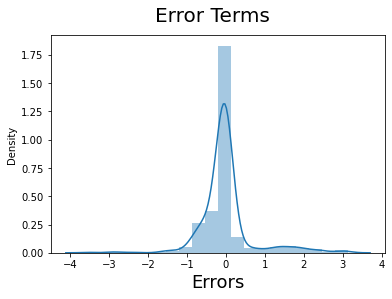

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [66]:
num_vars = ['new_cases', 'total_deaths', 'new_cases', 'total_deaths','total_boosters', 'new_deaths', 'people_fully_vaccinated',
       'total_vaccinations',  'new_vaccinations', 'tests_units']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [67]:
y_test = df_test.pop('new_cases')
X_test = df_test

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Making predictions
y_pred = lm2.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

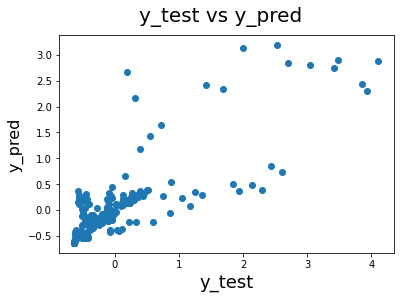

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [71]:
y_test

125   -0.526416
632   -0.452128
358   -0.471668
248    0.241089
427    0.324271
         ...   
750   -0.376762
743   -0.043547
310   -0.214033
353   -0.477210
654   -0.519358
Name: new_cases, Length: 242, dtype: float64

In [72]:
y_pred

125   -0.404313
632    0.162002
358   -0.495729
248    0.131583
427   -0.243753
         ...   
750   -0.174566
743    0.225575
310   -0.218747
353   -0.499404
654   -0.120643
Length: 242, dtype: float64

In [95]:
x= np.array(y_pred)

In [101]:
scaler.inverse_transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.40431343  0.16200244 -0.49572875  0.1315833  -0.24375304 -0.64048013
  0.10833651 -0.2495358  -0.46173094 -0.26617856  0.2352806   0.23305854
 -0.40015274  0.0270699  -0.16465775 -0.4278838  -0.54494743 -0.61983712
  0.28474073  0.13907254 -0.50167355 -0.27283566 -0.52924239 -0.15044395
 -0.08100439 -0.44175963  0.24493337 -0.03567639 -0.58488733  0.18234371
 -0.64048013  0.84296614  1.43370107 -0.36497248  0.11743696  0.530355
  2.3326032   0.1188205  -0.63964799 -0.13377931  0.505703    0.2921859
 -0.29447124 -0.12325826  0.30669109  1.64501518  0.09663352 -0.52746982
  0.05531281  0.28802521  0.28636093  0.2074086   0.16403668  0.31964644
 -0.15498368 -0.17048271 -0.58405519 -0.20365343 -0.19794326  0.38621747
 -0.26285001  0.26978998  0.1878867  -0.11778537 -0.64048013 -0.11096445
 -0.54328044 -0.34273523 -0.53329479 -0.00691336  0.22113572  0.15603819
  0.08581573 -0.64048013 -0.18558664 -0.53167522 -0.13886148 -0.21957884
 -0.21791457 -0.22041098 -0.13303651 -0.54403037 -0.19105701 -0.21458601
  0.29311701 -0.19211829  0.19815433 -0.53729497 -0.18962188  0.0686599
 -0.38184571 -0.29031055 -0.23163388  0.30799651  0.16506723  3.12785592
 -0.43807814 -0.30362476 -0.06549086 -0.64048013 -0.17788748  2.16455936
  0.10911558 -0.52266295 -0.55136877 -0.07894756  0.28655625 -0.53329479
 -0.10973665 -0.20460036  0.21410271 -0.22754157 -0.09262048  0.34808639
  0.23476334  2.80569894  0.16733977 -0.05315128 -0.08650144  0.14995892
 -0.28349686  0.01402153 -0.03401212  0.08997641 -0.27866062 -0.00405515
 -0.498345   -0.02319432  2.83807548 -0.13860171  3.18598978  0.65848345
 -0.51082707 -0.56060354 -0.51914844  0.20897212 -0.53765833 -0.25868932
 -0.07598762  0.37956036  0.11427803  2.90275544 -0.18759367  1.18112431
 -0.19384165 -0.11472817  0.1720749  -0.54391623  0.73769342 -0.13031306
 -0.10534331 -0.64048013 -0.47670942  0.24808259 -0.51971997 -0.4916879
 -0.4794039  -0.05820524  0.43299011  2.30472923 -0.64048013  0.32297499
 -0.61983712  0.48261919 -0.20865916 -0.59237657  0.25640397 -0.61318001
 -0.091592   -0.64048013  0.36444689  2.42490799 -0.50999493  0.14406537
  0.07583007 -0.53828761 -0.50646363 -0.20151523  0.00341677 -0.07894756
 -0.51582858 -0.25203221 -0.49668072 -0.52330913 -0.59653726 -0.57074099
  0.32547141 -0.22457167 -0.13153071 -0.29779979  0.28636093  0.32297499
 -0.43593467 -0.6173407  -0.39219632 -0.64048013 -0.53620738  2.42626605
 -0.60901932  0.18816867 -0.07125145 -0.50666638 -0.38820692  0.16570095
  0.27018724 -0.64048013  0.21559826 -0.1998075   0.35707496 -0.10301123
 -0.29910745 -0.10623    -0.61983712 -0.41247049  2.88398139  0.03571473
 -0.64048013 -0.53530367  2.67400213 -0.1887939  -0.08114771  0.2141909
 -0.10677622 -0.39785674 -0.36021013 -0.16038056 -0.61983712  0.36291761
  2.737468   -0.16216133 -0.43833532  0.26638962 -0.28115704  0.38269177
 -0.24141243 -0.19837511 -0.3244282  -0.17456584  0.22557479 -0.2187467
 -0.49940394 -0.12064306].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
scaler.inverse_transform(np.array(y_pred).reshape( (-1, 1)))

ValueError: non-broadcastable output operand with shape (242,1) doesn't match the broadcast shape (242,12)

In [ ]:
X_test_new

In [74]:
X_test_new['new_cases'] = y_pred

In [ ]:
X_test_new

In [ ]:
y_pred

In [ ]:
scaler.inverse_transform(X_test_new)

In [ ]:
np.array(X_test_new).reshape(-1,1)

In [ ]:
scaler.inverse_transform(np.array(y_pred).reshape((1, -1)))

In [ ]:
X_test_new.shape